In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_15 = pd.read_csv('../data/df_15.csv')

In [5]:
toxicity_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", "neutral"]
toxicity_count = df_15[toxicity_classes].apply(pd.value_counts).T
toxicity_count[1]

toxic            11591
severe_toxic      1219
obscene           6526
threat             336
insult            6139
identity_hate     1130
neutral          27232
Name: 1, dtype: int64

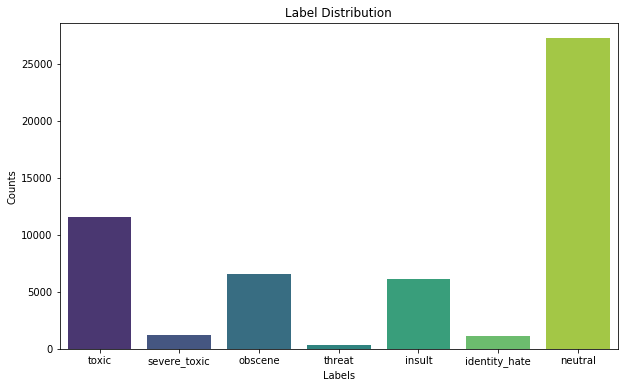

In [7]:
data = {
    'Labels': ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'neutral'],
    'Counts': [11591, 1219, 6526, 336, 6139, 1130, 27232]
}

plt.figure(figsize=(10, 6))
sns.barplot(x='Labels', y='Counts', data=data, palette='viridis')  # Use Seaborn's barplot
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Distribution')


plt.savefig("augmented_label_distributions.png", dpi=300, bbox_inches="tight") 

In [14]:
toxicity_proportion = shuffled_15[toxicity_classes].apply(lambda x: x.value_counts(normalize=True)).T
toxicity_proportion

,0,1
toxic,0.707005,0.292995
severe_toxic,0.969266,0.030734
obscene,0.838904,0.161096
threat,0.991932,0.008068
insult,0.845563,0.154437
identity_hate,0.971443,0.028557
neutral,0.311692,0.688308


Since this dataset is multilabel I want to see what different types of label combinations exist. 

In [16]:
labels_only = shuffled_15[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'neutral']]

In [17]:
labels_only.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,1,1,1,0,1,0,0


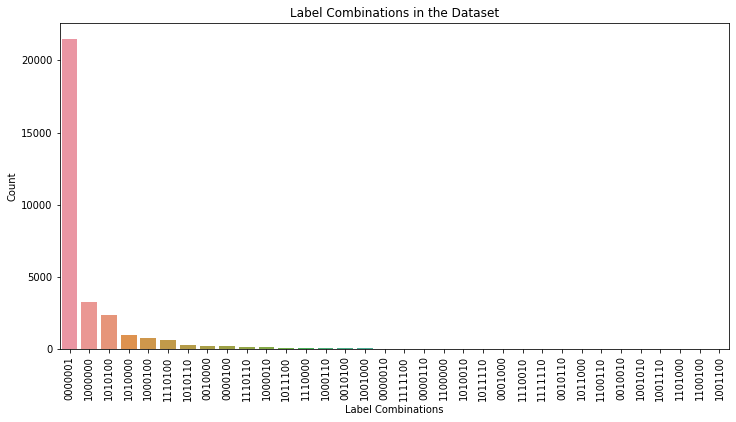

In [18]:
# Get combinations of labels for each observation
label_combinations = labels_only.apply(lambda x: ''.join(x.astype(str)), axis=1)

# Count the occurrences of each label combination
label_combination_counts = label_combinations.value_counts()

# Viz
plt.figure(figsize=(12, 6))
sns.barplot(x=label_combination_counts.index, y=label_combination_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Label Combinations')
plt.ylabel('Count')
plt.title('Label Combinations in the Dataset')
plt.show()

Let's add the actual column names associated with the above combos

In [19]:
#empty list
positive_labels = []

#loop through label combo count index, which has 0/1 combos
for combination in label_combination_counts.index:
    
    #empty label list
    labels = []
    
    #use enumerate to get 0/1 and associated index
    for i, label in enumerate(combination):
        if label == '1':
            #append to labels list if positive
            labels.append(labels_only.index[i])
    positive_labels.append(labels)

# Add the positive_label indexes to the label_combination_counts df
label_combination_counts_df = label_combination_counts.reset_index()
label_combination_counts_df['positive_labels'] = positive_labels
label_combination_counts_df.rename(columns={'index': 'label_combination', 0: 'count'}, inplace=True)

print(label_combination_counts_df[:10])

  label_combination  count  positive_labels
0           0000001  21500              [6]
1           1000000   3292              [0]
2           1010100   2376        [0, 2, 4]
3           1010000    972           [0, 2]
4           1000100    776           [0, 4]
5           1110100    612     [0, 1, 2, 4]
6           1010110    332     [0, 2, 4, 5]
7           0010000    200              [2]
8           0000100    196              [4]
9           1110110    156  [0, 1, 2, 4, 5]


In [20]:
# map column names back to indices to have a list of toxicity types rather than index numbers
label_combination_counts_df['label_combos'] = label_combination_counts_df['positive_labels'].apply(lambda indices: list(labels_only.columns[indices]))

In [21]:
label_combination_counts_df.head()

,label_combination,count,positive_labels,label_combos
0,0000001,21500,[6],[neutral]
1,1000000,3292,[0],[toxic]
2,1010100,2376,"[0, 2, 4]","[toxic, obscene, insult]"
3,1010000,972,"[0, 2]","[toxic, obscene]"
4,1000100,776,"[0, 4]","[toxic, insult]"


 take them out of the list format... they should probably just be strings...

In [22]:
label_combination_counts_df['label_combos'] = label_combination_counts_df['label_combos'].apply(', '.join)

In [23]:
label_combination_counts_df.head()

,label_combination,count,positive_labels,label_combos
0,0000001,21500,[6],neutral
1,1000000,3292,[0],toxic
2,1010100,2376,"[0, 2, 4]","toxic, obscene, insult"
3,1010000,972,"[0, 2]","toxic, obscene"
4,1000100,776,"[0, 4]","toxic, insult"


I'll set the label_combos column as the index so I can visualize the counts of each combo

In [24]:
label_combination_counts_df.set_index('label_combos', inplace=True)

In [25]:
label_combination_counts_df.head()

,label_combination,count,positive_labels
label_combos,,,
neutral,0000001,21500,[6]
toxic,1000000,3292,[0]
"toxic, obscene, insult",1010100,2376,"[0, 2, 4]"
"toxic, obscene",1010000,972,"[0, 2]"
"toxic, insult",1000100,776,"[0, 4]"


I want to see what the full visualization looks like, but will likely need to scale it back

In [26]:
label_combos_10 = label_combination_counts_df.head(10)

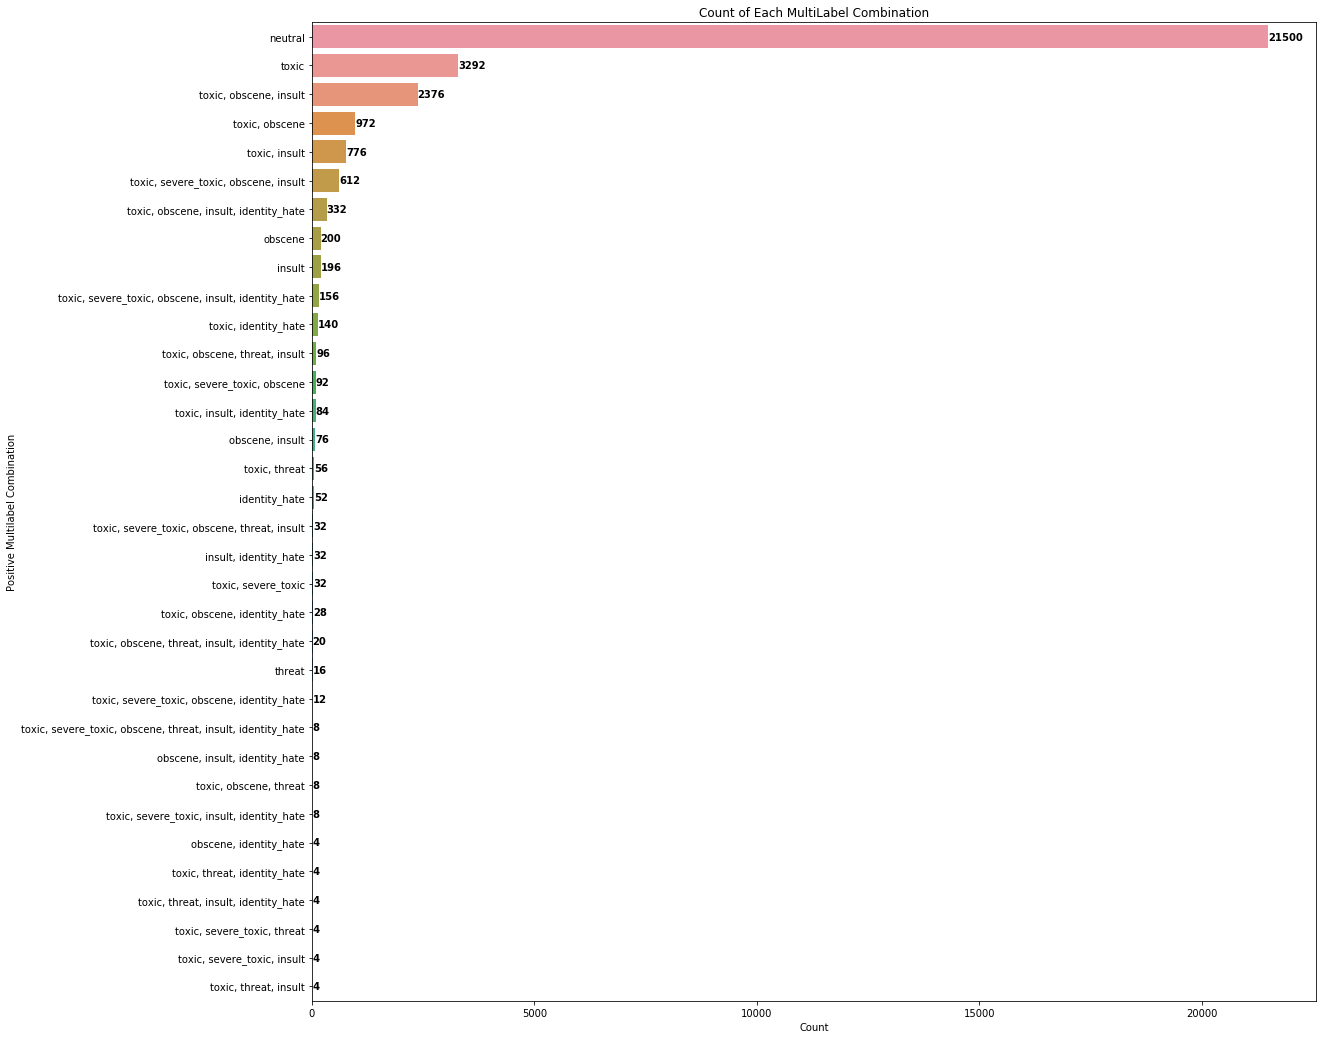

In [27]:
plt.figure(figsize=(18, 18))
ax = sns.barplot(y=label_combination_counts_df.index, x='count', data = label_combination_counts_df, orient = 'h')
plt.title('Count of Each MultiLabel Combination')
plt.ylabel('Positive Multilabel Combination')
plt.xlabel('Count')

# Add count values at the end of each bar
for index, value in enumerate(label_combination_counts_df['count']):
    ax.text(value, index, str(value), ha='left', va='center', color='black', fontweight='bold')

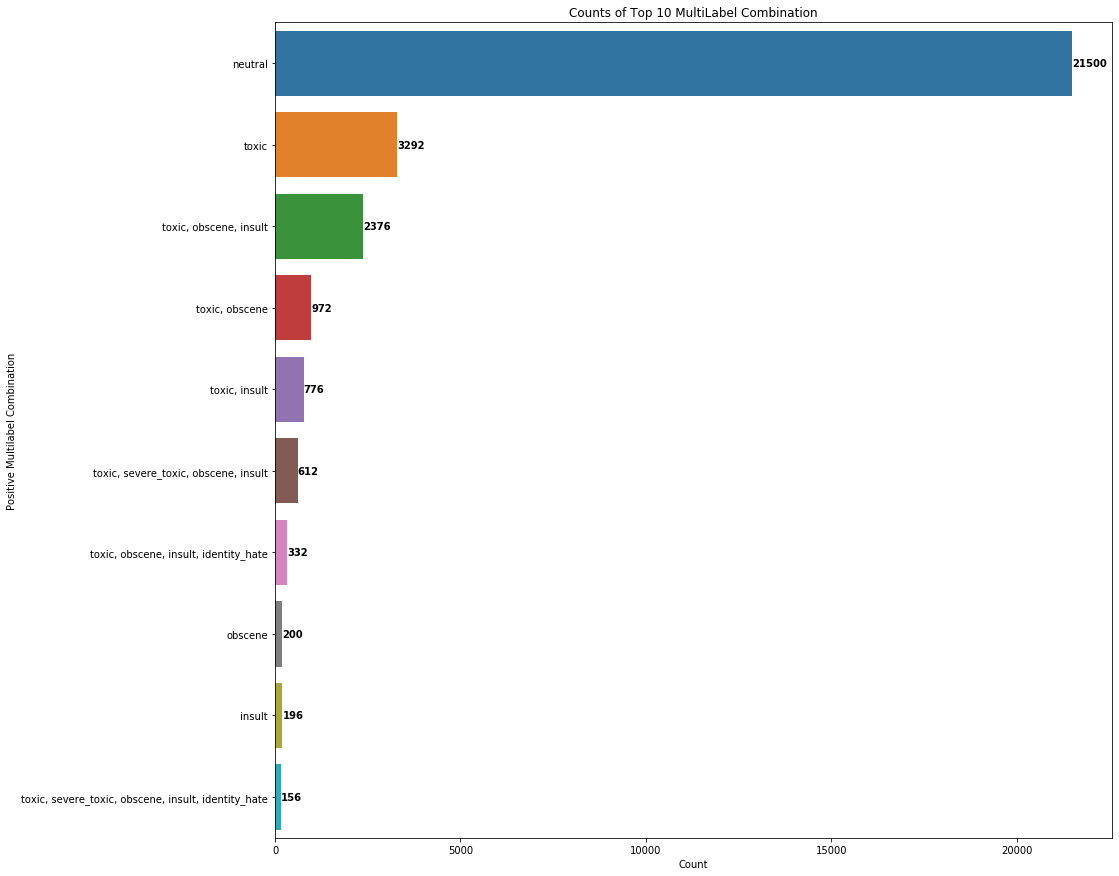

In [29]:
plt.figure(figsize=(15, 15))
ax = sns.barplot(y=label_combos_10.index, x='count', data = label_combos_10, orient = 'h')
plt.title('Counts of Top 10 MultiLabel Combination')
plt.ylabel('Positive Multilabel Combination')
plt.xlabel('Count')

# Add count values at the end of each bar
for index, value in enumerate(label_combos_10['count']):
    ax.text(value, index, str(value), ha='left', va='center', color='black', fontweight='bold')

Another way to look at this:

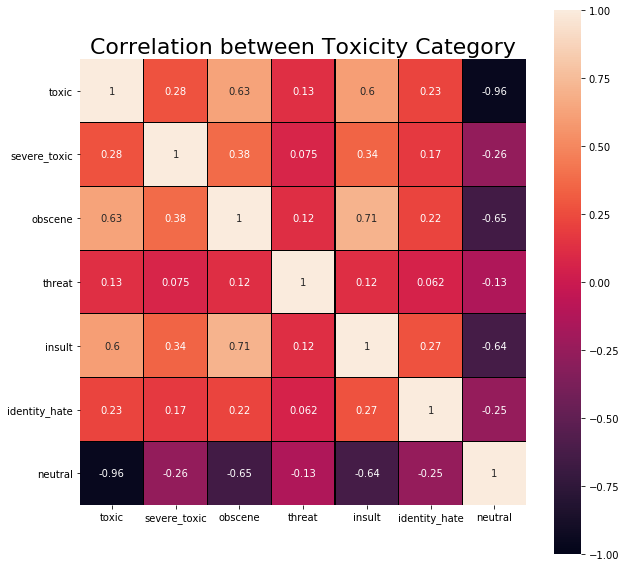

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(shuffled_15[toxicity_classes].corr(),
            linewidths=0.1,
            linecolor= 'black',
            vmax =1.0,
            vmin = -1.0,
            square=True,
            annot=True,

           );
plt.title('Correlation between Toxicity Category', fontsize=22);




In [31]:
### subsample dataset for modeling - trying to keep classes similar to original dataset

https://medium.com/gumgum-tech/creating-balanced-multi-label-datasets-for-model-training-and-evaluation-16b6a3a2d912

In [32]:
shuffled_15.head()

,binary_tox,capitalized letters,character count,cleaner_text,comment_text,compound,identity_hate,insult,lemmatized_text,lgbtq hate,...,neutral,obscene,pos,racial_ethnic slurs,severe_toxic,special characters,swear words,threat,toxic,word count
0,0,12,42,REDIRECT Talk:Lucy of the Southern Rainbow,REDIRECT Talk:Lucy of the Southern Rainbow,0.0000,0,0,REDIRECT Talk : Lucy Southern Rainbow,0,...,1,0,0.000,0,0,1,0,0,0,6
1,0,1,30,"Wow, why don't you get a life?","Wow, why don't you get a life?",0.5859,0,0,"Wow , n't life ?",0,...,1,0,0.432,0,0,3,0,0,0,7
2,1,49,262,""" That's it. I'M THE ONE BLOCKED FOR PERSO...","""\n\n That's it. \n\nI'M THE ONE BLOCKED FOR P...",-0.9477,0,0,`` 's . 'M lug personal attempt ? ! holy_place...,0,...,0,1,0.000,0,0,22,3,0,1,46
3,1,0,154,butt butt butt butt butt butt butt butt butt b...,butt butt butt butt butt butt butt butt butt b...,0.0000,0,0,butt butt butt butt butt butt butt butt butt b...,0,...,0,0,0.000,0,0,0,0,0,1,32
4,1,21,27,FUCK YOU FUCK YOU FUCK YOUa,FUCK YOU FUCK YOU FUCK YOUa,-0.9287,0,1,fucking be_intimate have_sex YOUa,0,...,0,1,0.000,0,1,0,3,0,1,6


In [34]:
shuffled_15.shape

(31236, 23)

In [35]:
shuffled_15.to_csv('df_15.csv', index = False)